In [13]:
# This notebook contains code to plot heterozygosity and number of common alleles distributions to determine 
# bin edges

In [14]:
%pylab inline
import matplotlib
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/results/'
import time
import statistics

Populating the interactive namespace from numpy and matplotlib


In [15]:
def main():
    
    means = [10**-3, 10**-2] #10**-5, 10**-4, 
    pers = [2,3]
    opt_dic = {}
    opt_dic[2] = [11,20]
    opt_dic[3] = [5,13]
    opt_dic[4] = [7,10]
    k_list = [0.2,0.3,0.6]
    for mean in means:
        for k_val in k_list:
            theta_val = mean/k_val
            for period in pers:
                for optimal_allele in opt_dic[period]:
                    
                    model = 'eurodem_prior2'#'1a9' #'eurodem_prior2_dinuc_c'
                    label = 'Het'#'Num common alleles'
                    setting = str(period) + ' ' + str(optimal_allele) + ' ' + str(k_val) + ' ' + str(theta_val)
                    
                    print(k_val*theta_val)
                    obs_het_stats = [1,1,1]
                    obs_common_stats = [1,1,1]
                    eps_het = [10,10,10]
                    eps_common = [10, 10,10]
                    obs_het_vector = [0,0,0]
                    obs_common_vector = [0,0,0]
                    use_common_alleles = False
                    num_bins = 0
                    use_bins = True
                    eps_bins_het =0.5 
                    eps_bins_common=0.5
                    
                    # Get ABC tables
                    ABC_tables = {}
                    opt_allele_dic = {}
                    opt_allele_dic[1] = [12,16]
                    opt_allele_dic[3] = [5,6,7,8,9,10,11,12,13]
                    opt_allele_dic[2] = [11,12,13,14,15,16,17,18,19,20]
                    opt_allele_dic[4] = [7,8,9,10]

                    obs_mean_het_list = []
                    obs_var_het_list = []
                    obs_med_het_list = []
                    obs_mean_comm_list = []
                    obs_var_comm_list = []
                    obs_med_comm_list = []

                    for opt_allele in opt_allele_dic[period]:
                        file = '/gymreklab-tscc/bonnieh/abc/results/'+model+'/' + str(period) + '_' + str(opt_allele) + '.txt' 
                        table = GetABCList(file, num_bins)
                        dic_summ_stats = {}
                        for combo in table:
                            s_round = get_LRT_bin(combo[0])
                            if s_round not in dic_summ_stats:
                                dic_summ_stats[s_round] = []
                            dic_summ_stats[s_round].append([combo[1], combo[2]])

                        ABC_tables[opt_allele] = dic_summ_stats

                    opt_allele_list = [(period,optimal_allele)] * 1000
                    het_list, common_list = EstimateParam(ABC_tables, opt_allele_list, k_val, theta_val, obs_het_stats, \
                                                            obs_common_stats, obs_het_vector, obs_common_vector, \
                                                          model, eps_het, eps_common, use_common_alleles,use_bins, eps_bins_het, eps_bins_common, True)

                    if label == 'Het':
                        list_to_use = het_list

                    else:
                        list_to_use = common_list
                    plt.hist(list_to_use,bins=[0,0.002,0.1,0.4,0.8,1]) #bins=[0,0.001,0.1,0.3,0.7,1] #[0,0.001,0.02,0.1,0.3,0.6,0.7,0.8,1]
                    
                    #plt.hist(list_to_use,bins=[0,2,4,22])
                    plt.xlabel(label)
                    plt.ylabel('Fraction of loci')
                    plt.title('Setting %s \n Simulated %s distribution \n Mean %s = %.2f Median %s = %.2f \n Max %s = %.2f Min %s = %.2f'%(setting, label, label, np.mean(list_to_use), label, np.median(list_to_use), label, max(list_to_use), label, min(list_to_use)))
                    plt.show()
                    '''
                    obs_mean_het = np.mean(het_list)
                    obs_var_het = np.var(het_list)
                    obs_med_het = np.median(het_list)
                    obs_mean_het_list.append(obs_mean_het)
                    obs_var_het_list.append(obs_var_het)
                    obs_med_het_list.append(obs_med_het)

                    obs_mean_common = np.mean(common_list)
                    obs_var_common = np.var(common_list)
                    obs_med_common = np.median(common_list)
                    obs_mean_comm_list.append(obs_mean_common)
                    obs_var_comm_list.append(obs_var_common)
                    obs_med_comm_list.append(obs_med_common)

                    print(np.mean(obs_mean_het_list)) 

                    print(np.mean(obs_var_het_list)) 
                    print(np.mean(obs_med_het_list)) 
                    print(np.mean(obs_mean_comm_list)) 
                    print(np.mean(obs_var_comm_list)) 
                    print(np.mean(obs_med_comm_list)) 

                    print(np.std(obs_mean_het_list)) 

                    print(np.std(obs_var_het_list)) 
                    print(np.std(obs_med_het_list)) 
                    print(np.std(obs_mean_comm_list)) 
                    print(np.std(obs_var_comm_list)) 
                    print(np.std(obs_med_comm_list)) 
                    '''

0.001


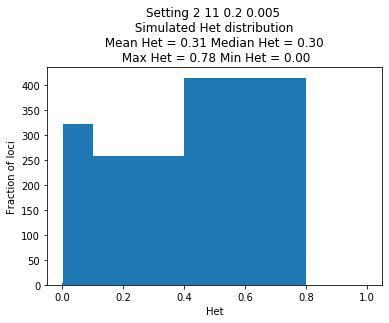

0.001


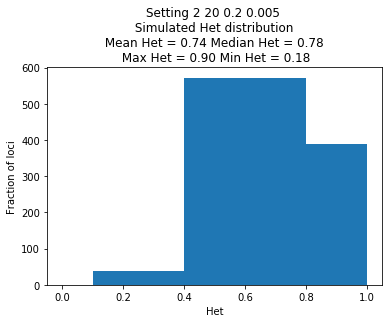

0.001


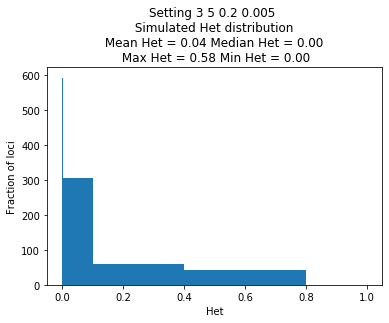

0.001


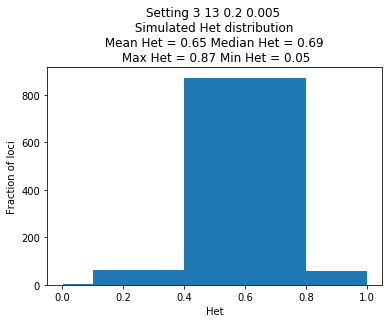

0.001


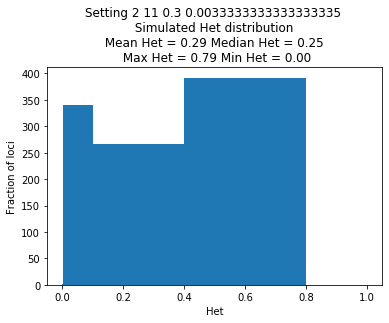

0.001


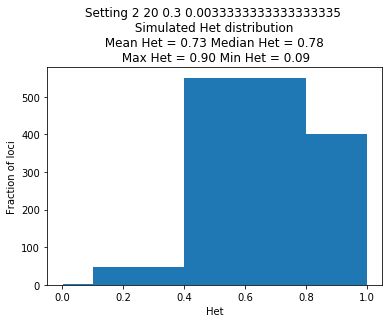

0.001


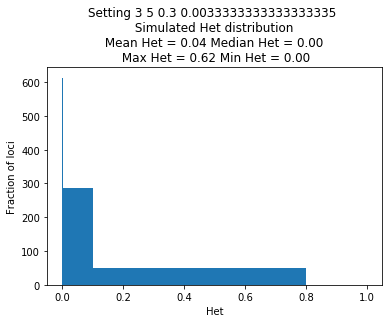

0.001


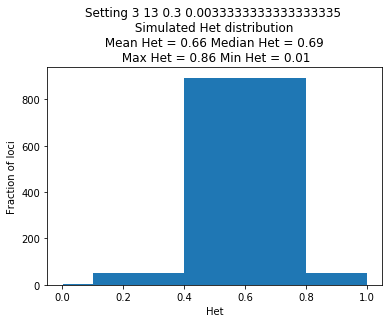

0.001


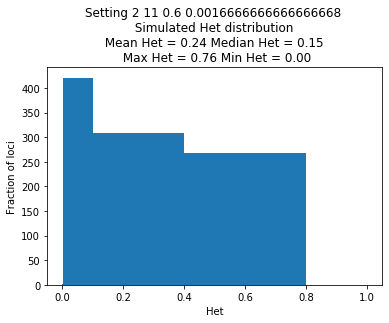

0.001


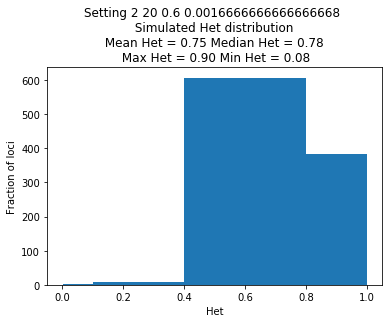

0.001


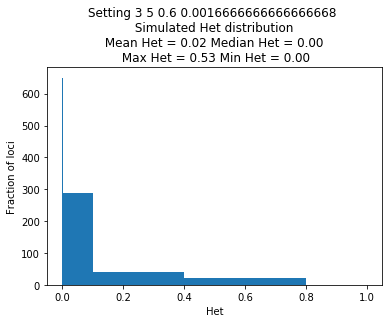

0.001


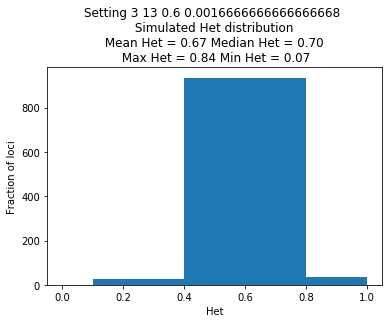

0.01


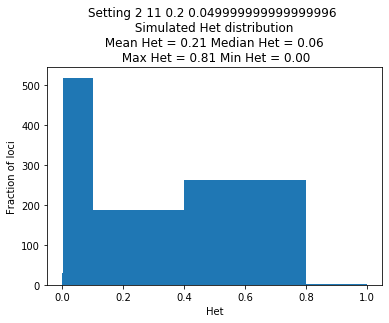

0.01


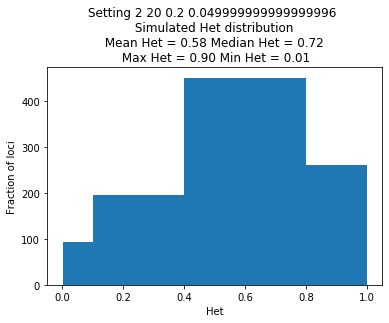

0.01


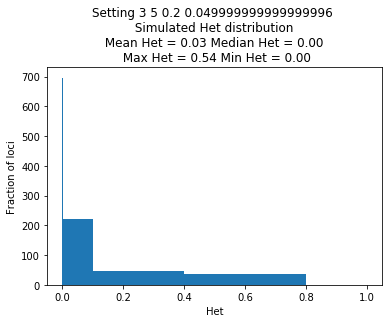

0.01


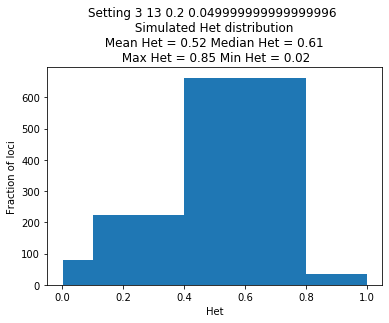

0.01


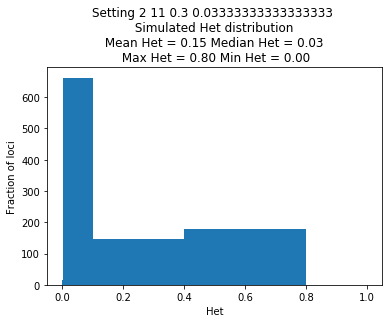

0.01


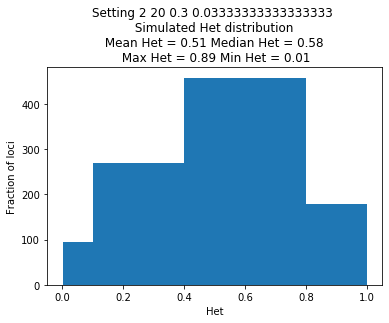

0.01


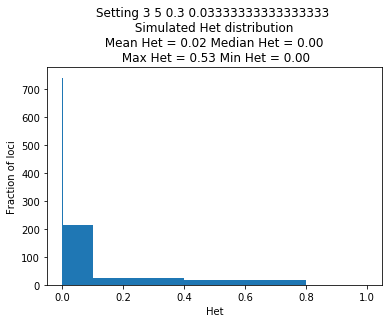

0.01


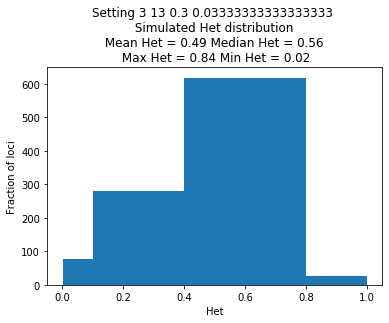

0.01


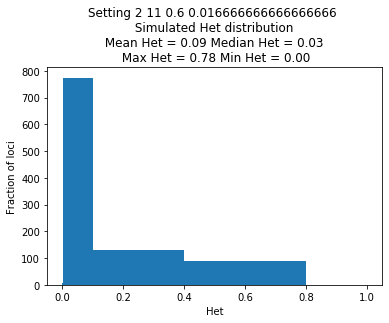

0.01


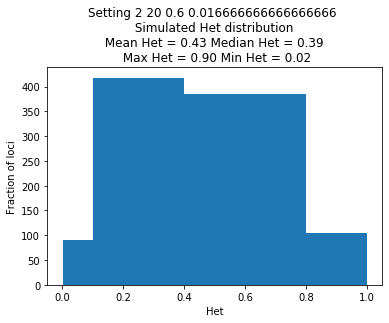

0.01


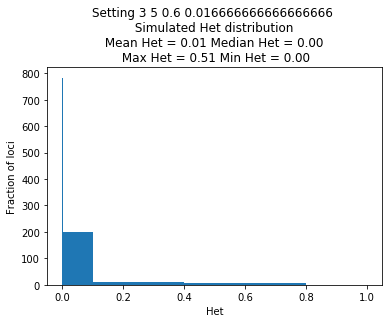

0.01


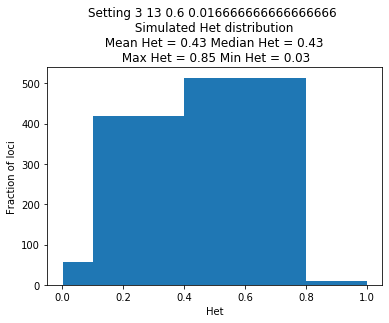

CPU times: user 18.1 s, sys: 582 ms, total: 18.7 s
Wall time: 18.8 s


In [16]:
%%time
if __name__ == '__main__':
    main()